<h1 style="text-align: center;">Macro Visualization and Market Analysis</h1>

* In this notebook, we will visualize and analyze macroeconomic data and market trends. The following sections will guide you through the process of updating macro data, visualizing macroeconomic indicators, and analyzing market data.


In [1]:
from macro import MacroData
import static
import bao

> Currently the visualization contain following data:
- CPI
- EX-IM
- Interest rate: lending, bench_mark
- Exchange rate
- T-bill rate

> If you want more data visualization, just adjust the macro.json file after looked for code in the "IFM data code.pdf"

In [2]:
macro_data = MacroData("./data/macro/", "./macro.json")
# Only run this when you want to update all macro data or run the first time or after you added macro data
# macro_data.create_or_update_all()

## 1. Visualize Some Macro Economics Data

> A notification will appear if IMF doesn't have a dataset for a country

> Default country is Vietnam

There is no country data for VN in GOV_BOND
There is no country data for VN in UNEMPLOYMENT_RATE


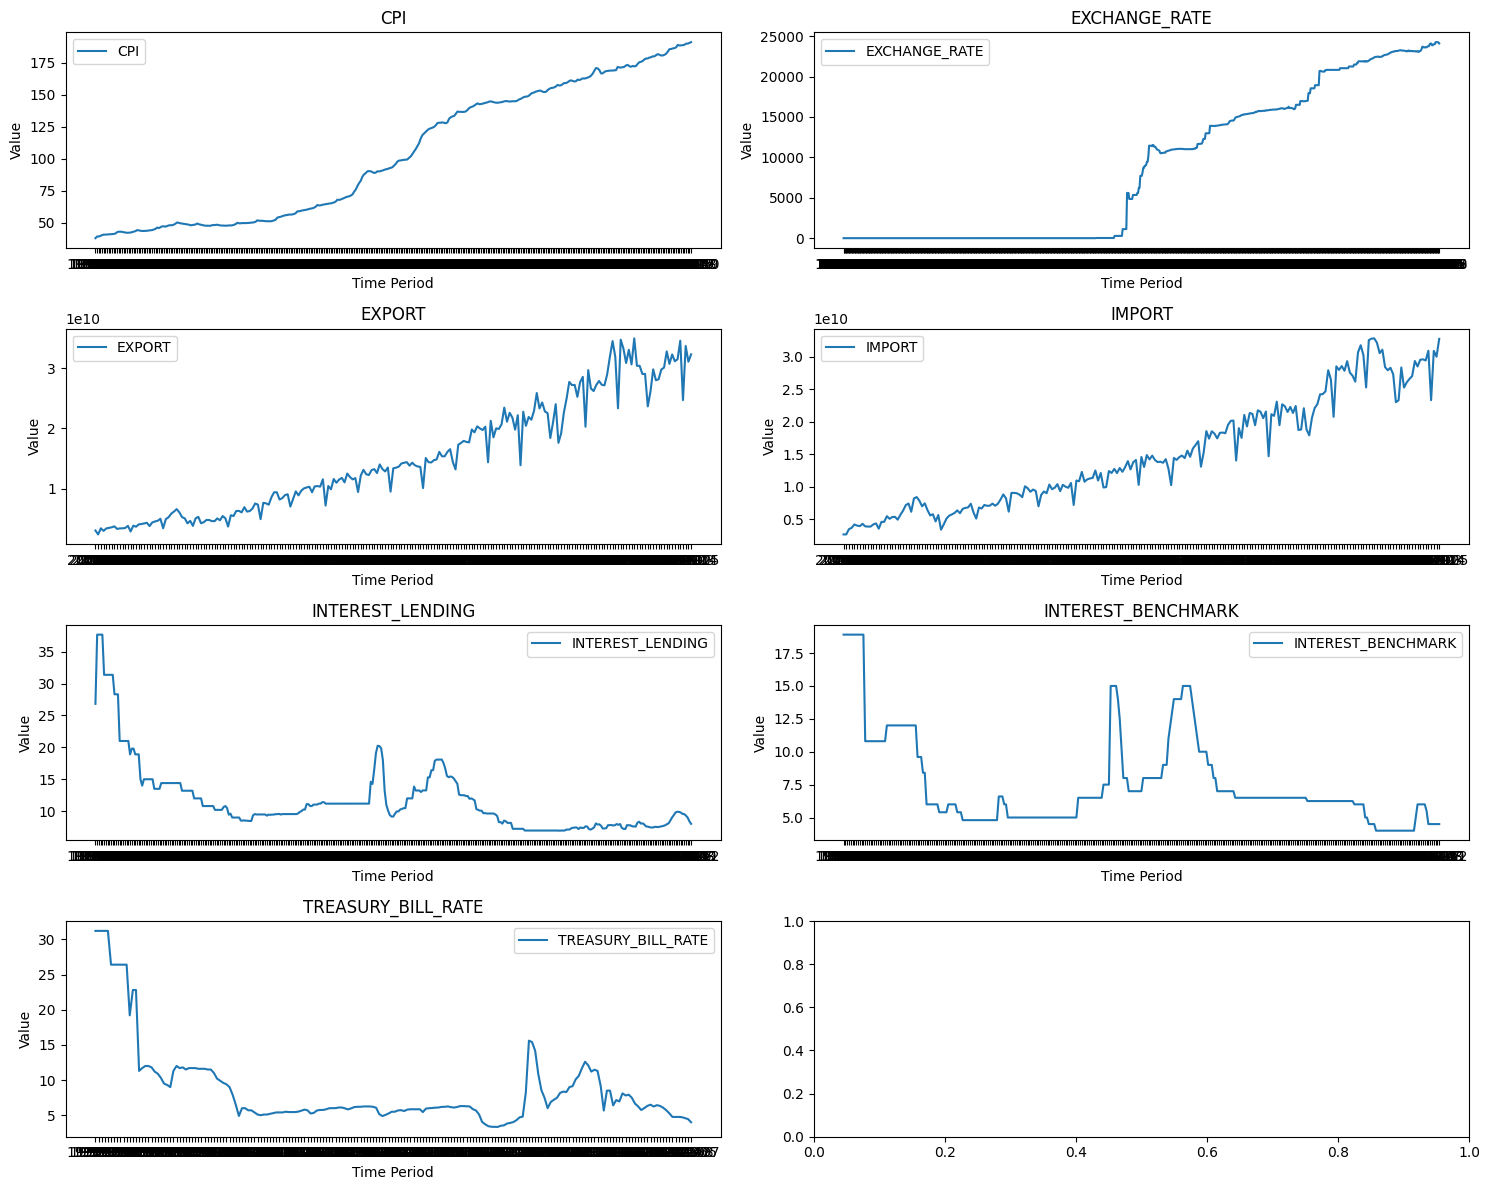

In [3]:
macro_data.visualize_macro()

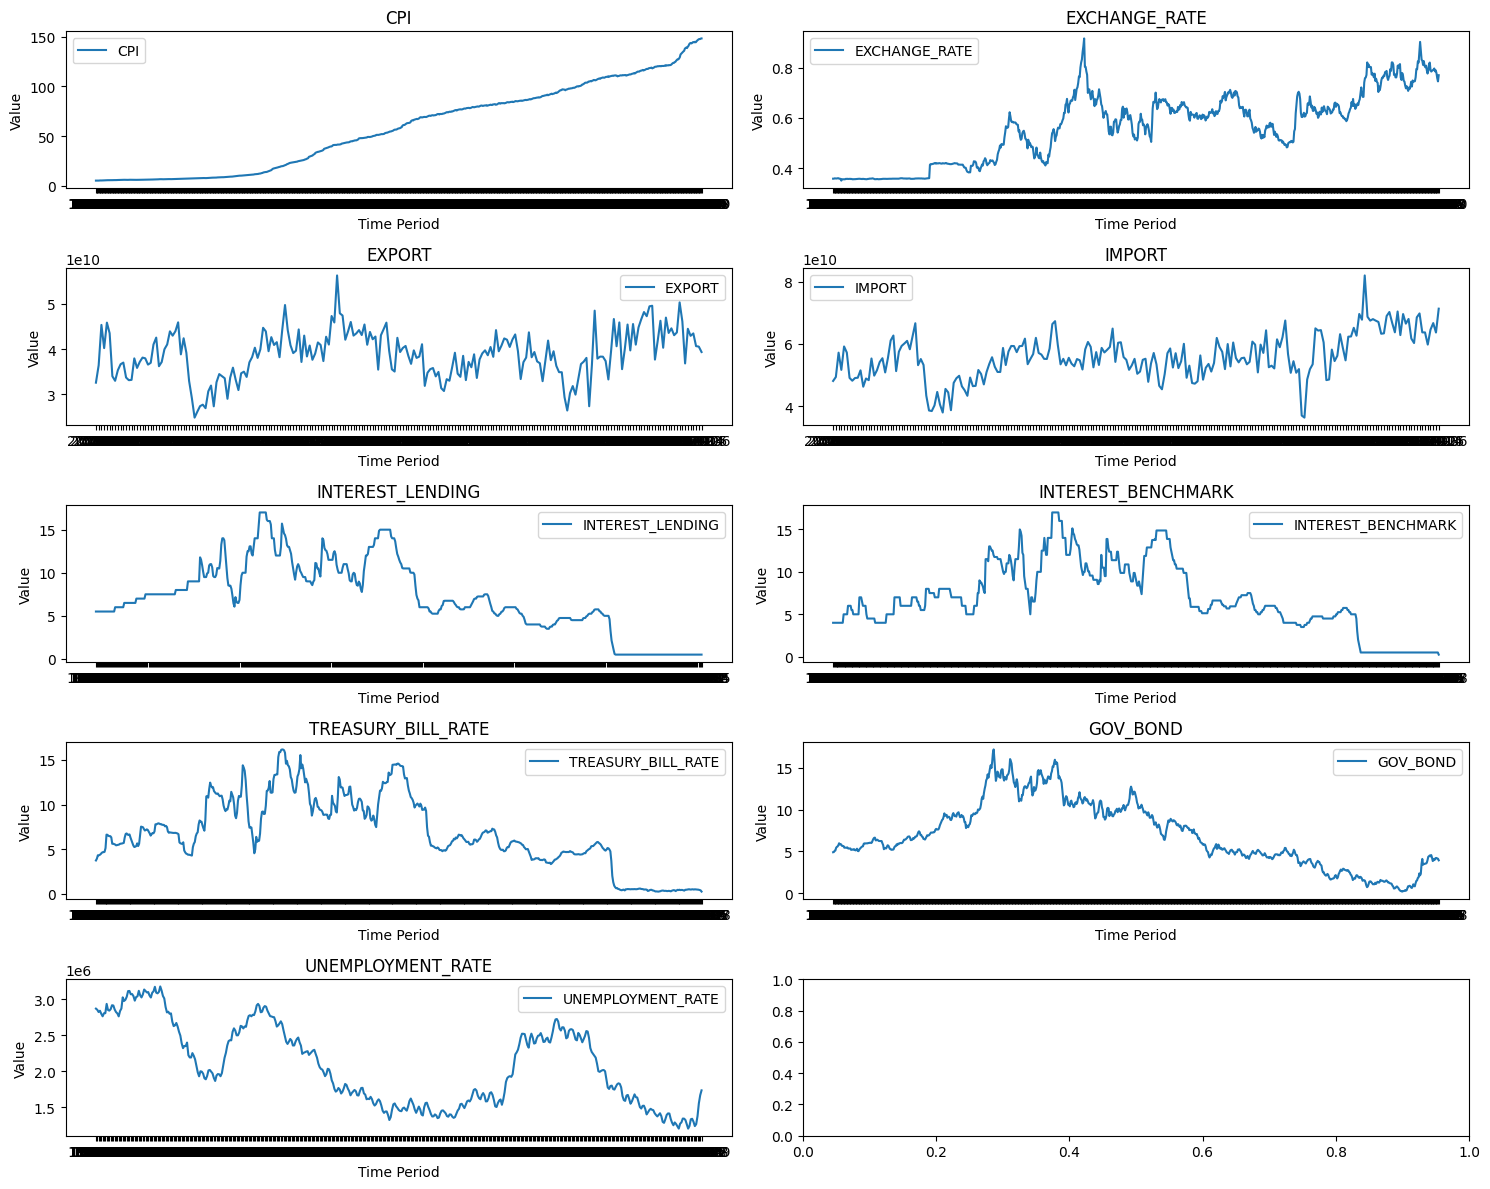

In [4]:
# now change the country to GB: Great Britain
macro_data.visualize_macro("GB")

## 2. Visualize Market

**Information about the stock spread, trend, and risk:**
- The spread indicates the difference or gap in price movement across different stock indices; higher spread suggests potentially more volatility.
- Trend analysis helps identify general direction and momentum in market returns over time.
- Risk reflects the degree of uncertainty or potential financial loss; it is often measured through volatility, drift, and jump thresholds in returns.

In [1]:
from static import *
from stock_data import *
import visualize
import logging

# Configure logging to show INFO level messages
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [2]:
Market_visual = visualize.MarketVisualize("./data/stock/", "./stock_dictionary.json")

2025-01-14 08:14:55,365 - INFO - Max time in merged data: 2025-01-10 00:00:00
2025-01-14 08:14:55,571 - INFO - Summary of tickers by exchange: {'DELISTED': 611, 'HNX': 313, 'HSX': 500, 'UPCOM': 884}


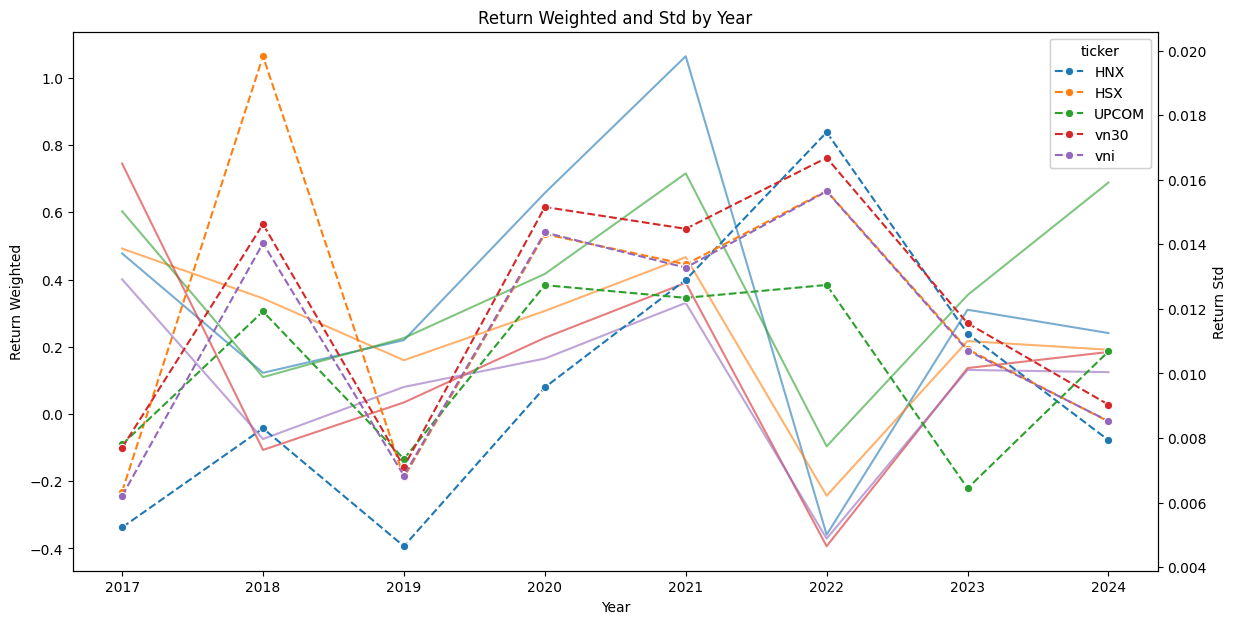

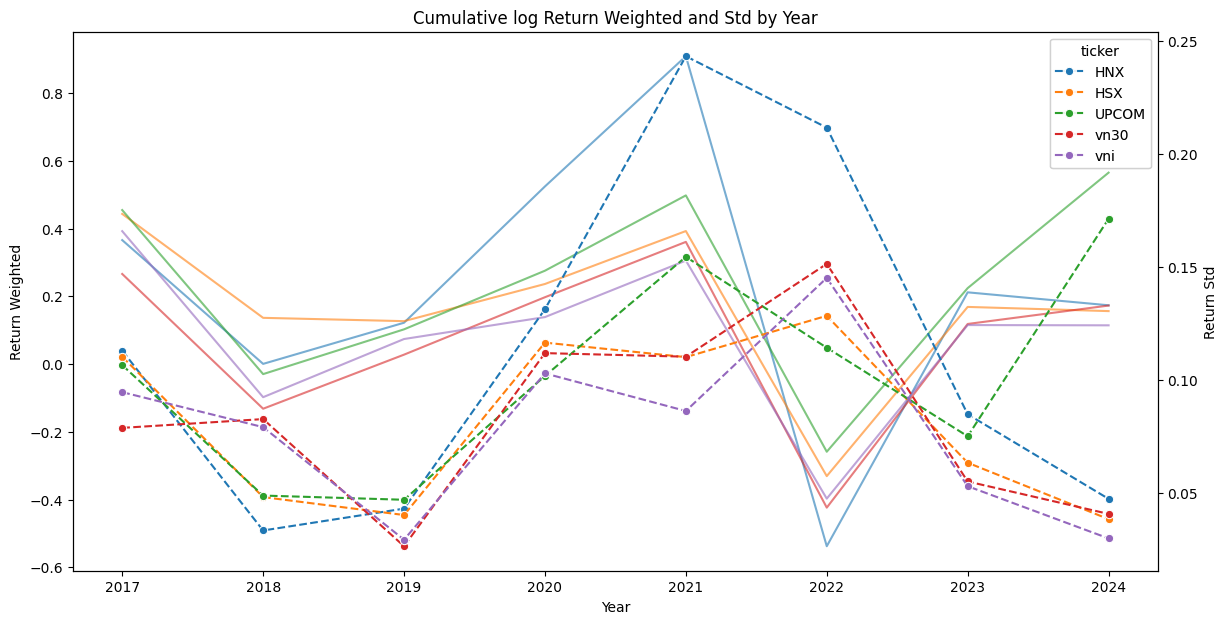

In [3]:
Market_visual.plot_risk_and_returns(min_year=2016)

2025-01-14 08:15:01,066 - INFO - Optimal window for exchange HNX: 45
2025-01-14 08:15:01,115 - INFO - Optimal window for exchange HSX: 240
2025-01-14 08:15:01,155 - INFO - Optimal window for exchange UPCOM: 140
2025-01-14 08:15:01,193 - INFO - Optimal window for exchange vn30: 235
2025-01-14 08:15:01,230 - INFO - Optimal window for exchange vni: 240


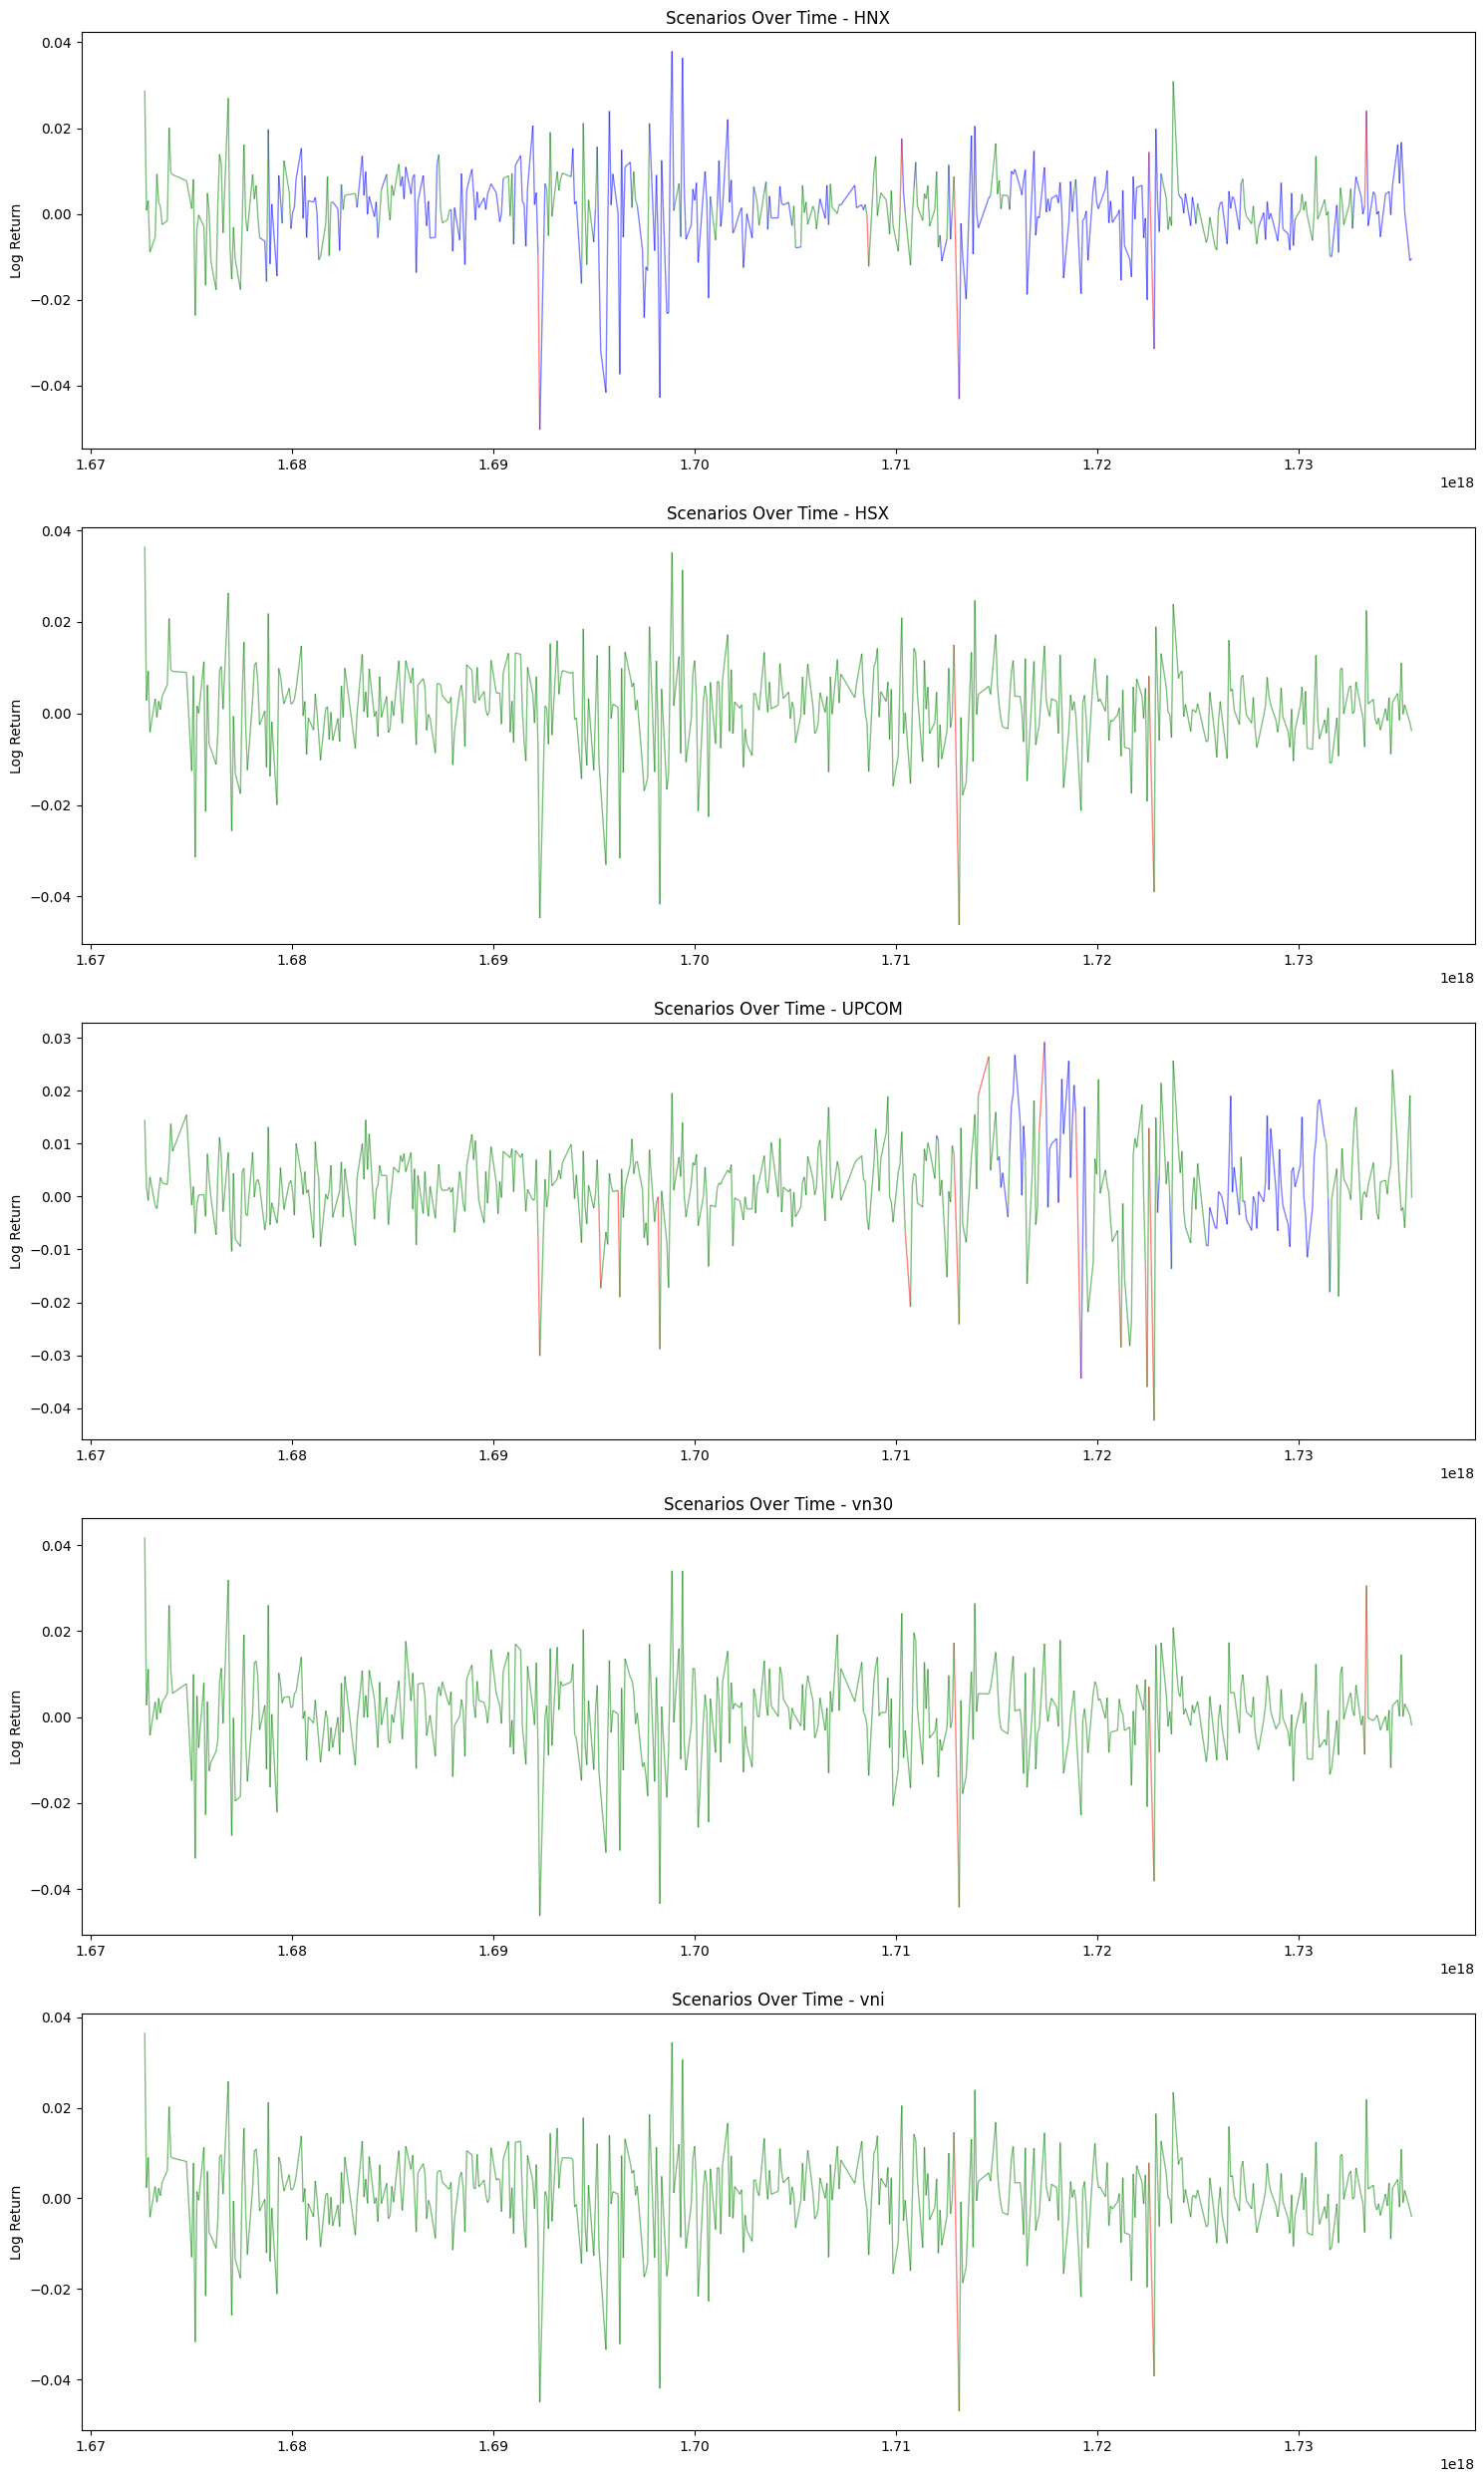

In [4]:
# jump, drift, no-drift period with best windows detection
Market_visual.plot_scenario(
    return_col="return",
    manual_windows=None,
    min_year=2022,
    jump_threshold=3,
    drift_threshold=0.00005,
)

2025-01-14 08:15:12,443 - INFO - Optimal window for exchange HNX: 252
2025-01-14 08:15:12,457 - INFO - Optimal window for exchange HSX: 252
2025-01-14 08:15:12,472 - INFO - Optimal window for exchange UPCOM: 252
2025-01-14 08:15:12,487 - INFO - Optimal window for exchange vn30: 252
2025-01-14 08:15:12,504 - INFO - Optimal window for exchange vni: 252


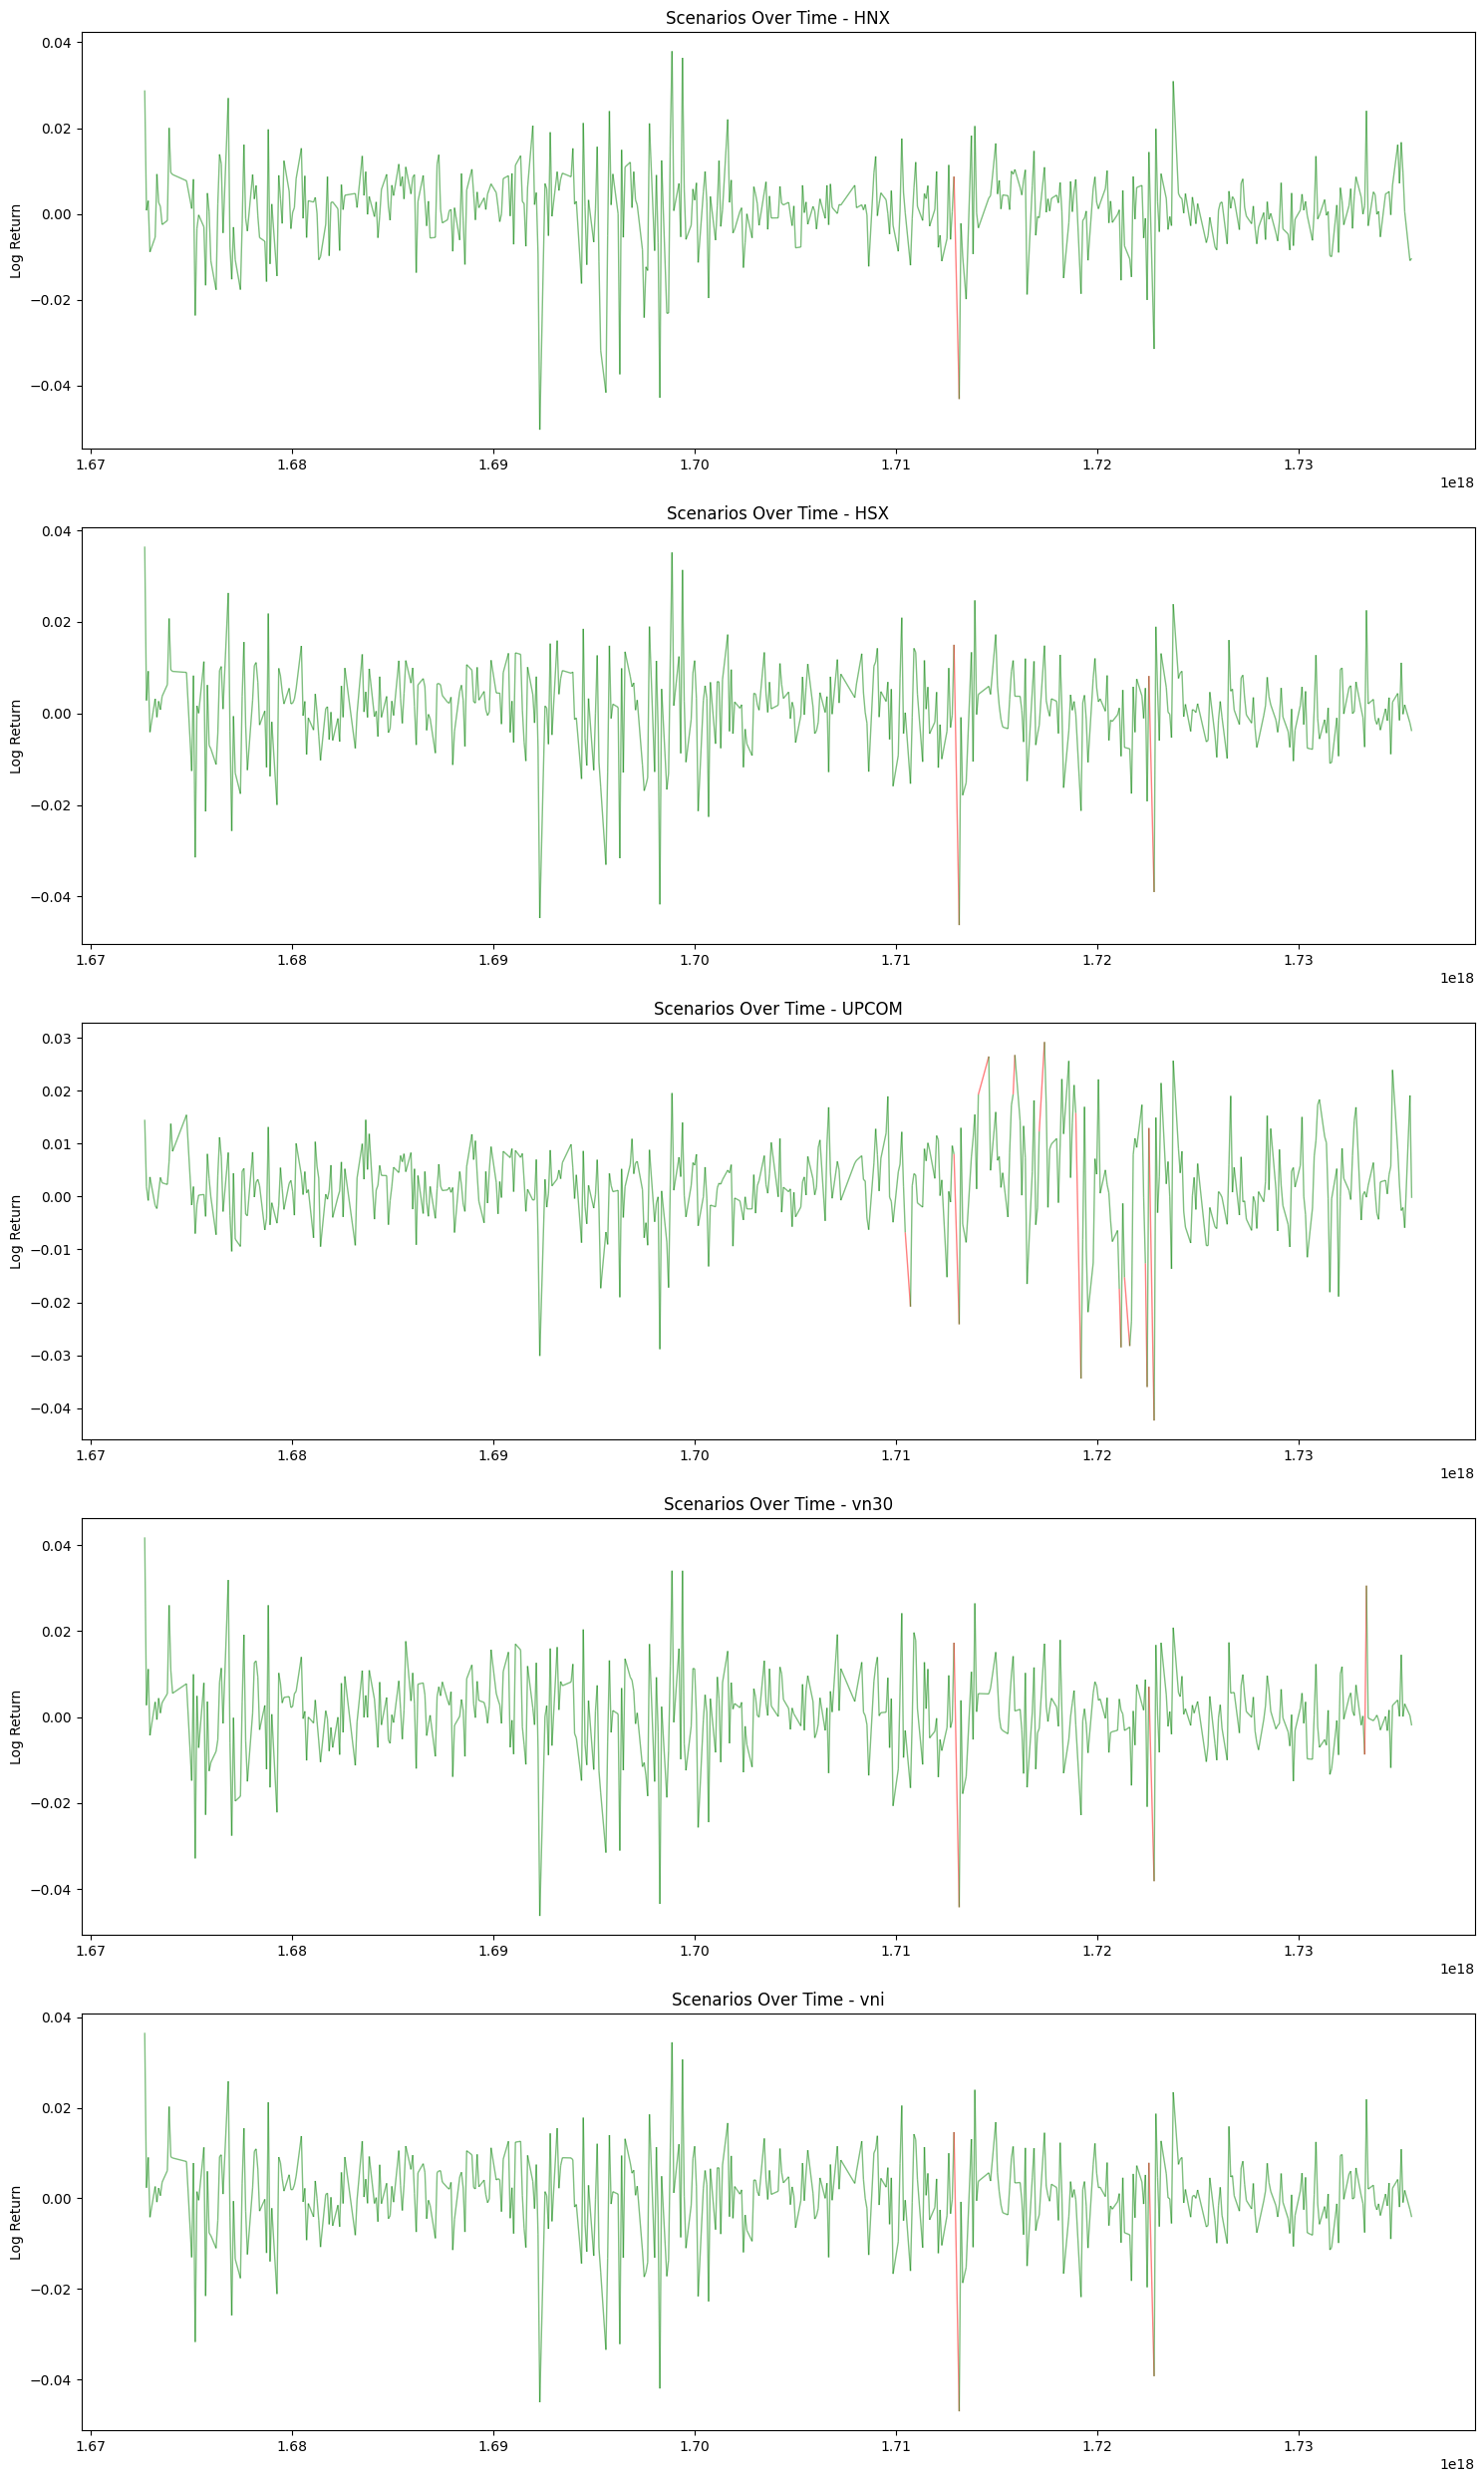

In [5]:
# jump, drift, no-drift period detection with given window size
Market_visual.plot_scenario(
    return_col="return",
    manual_windows=252,
    min_year=2022,
    jump_threshold=3,
    drift_threshold=0.00005,
)

2025-01-14 08:15:15,424 - INFO - Optimal window for exchange HNX: 45
2025-01-14 08:15:15,479 - INFO - Optimal window for exchange HSX: 240
2025-01-14 08:15:15,522 - INFO - Optimal window for exchange UPCOM: 140
2025-01-14 08:15:15,569 - INFO - Optimal window for exchange vn30: 235
2025-01-14 08:15:15,607 - INFO - Optimal window for exchange vni: 240


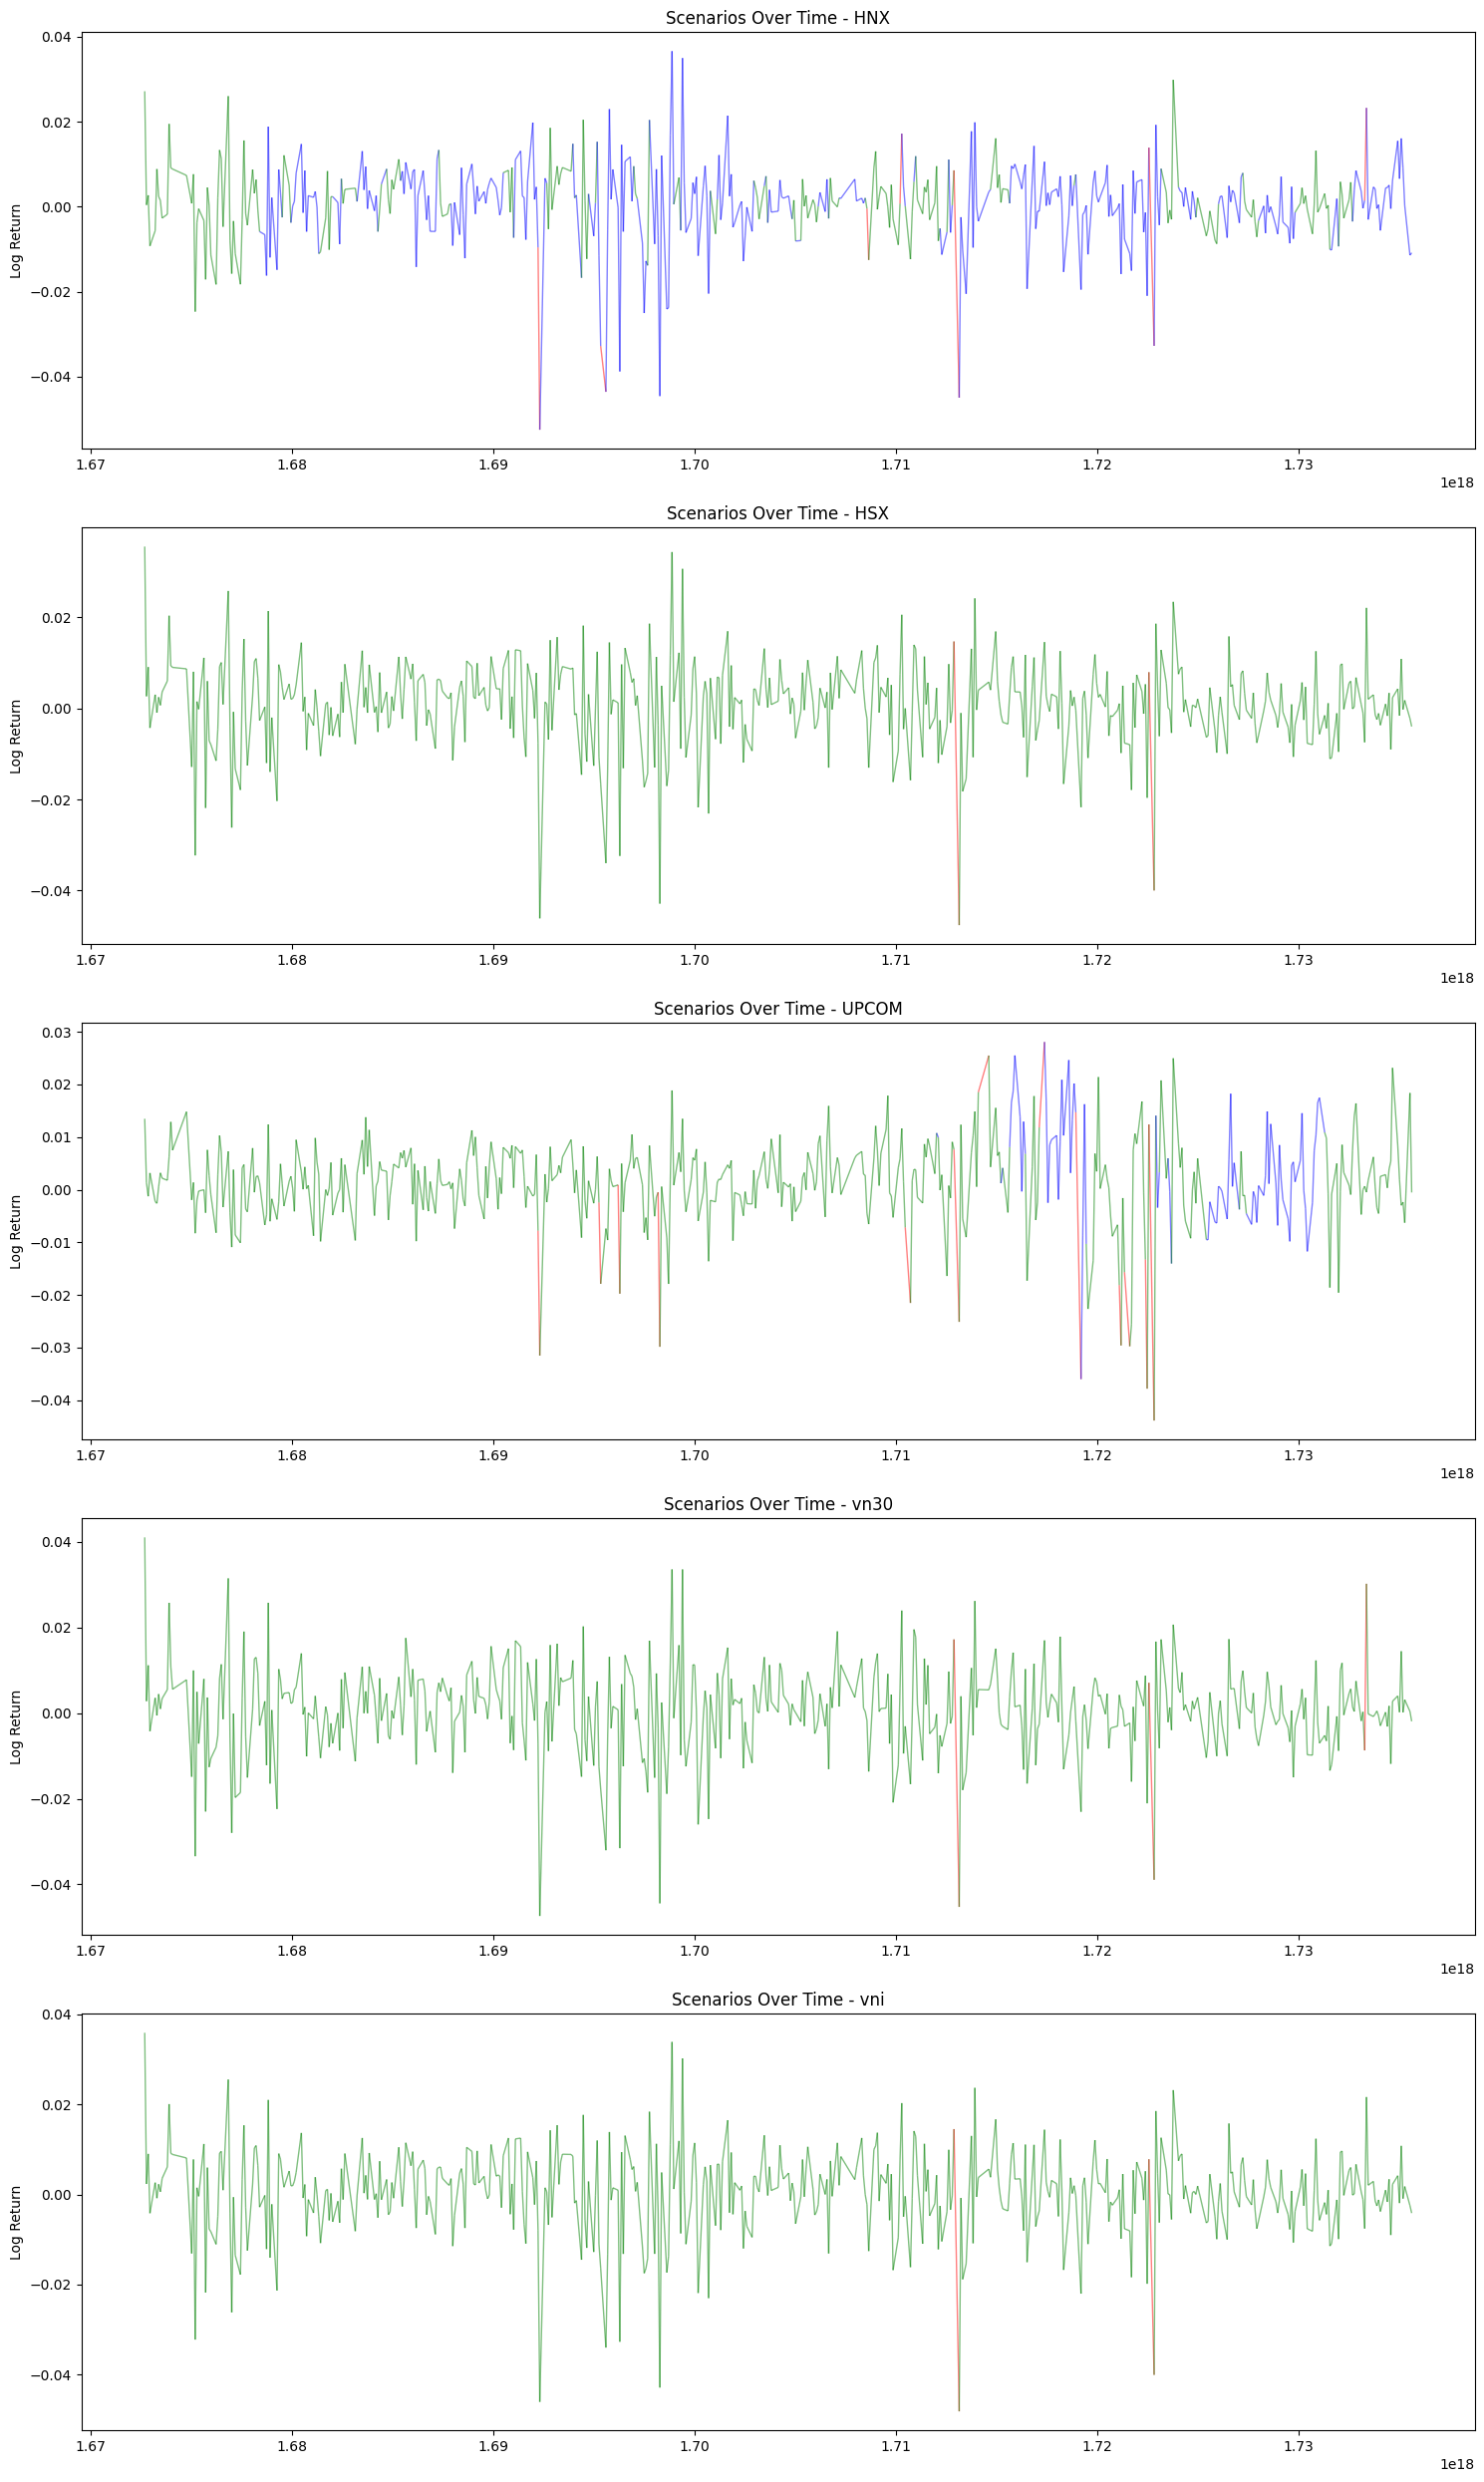

In [6]:
Market_visual.plot_scenario(
    return_col="log_return",
    manual_windows=None,
    min_year=2022,
    jump_threshold=3,
    drift_threshold=0.00005,
)

* We can see the abnormal movement including drift and jump in return

2025-01-14 08:15:18,659 - INFO - số lượng index:ticker
HNX      499
HSX      499
UPCOM    499
vn30     499
vni      499
Name: count, dtype: int64


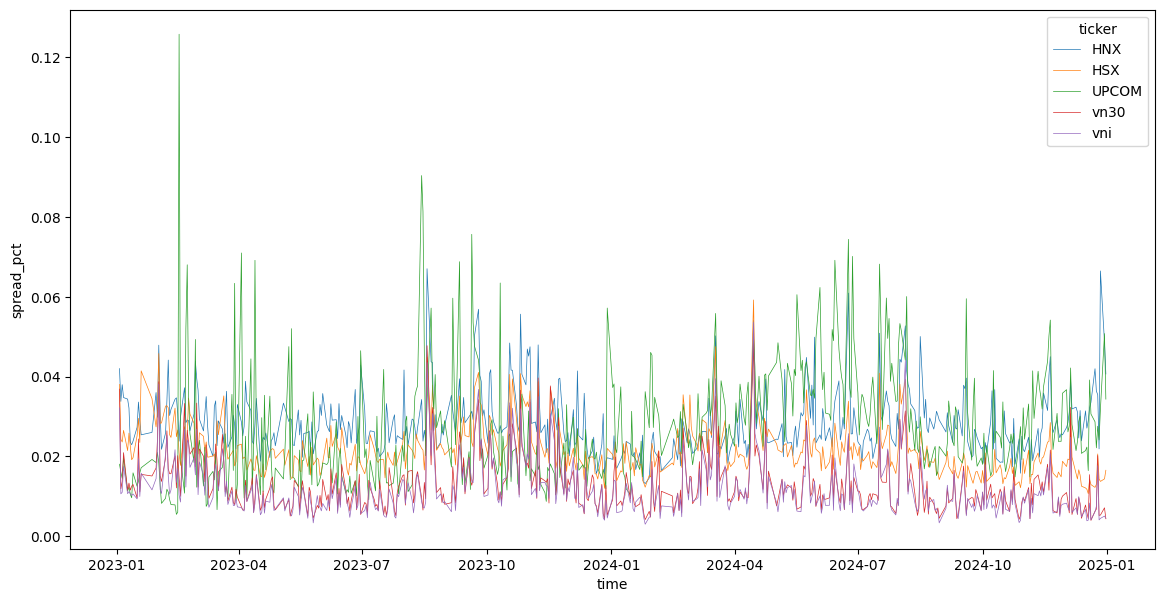

In [7]:
Market_visual.plot_spread(min_year=2022)

* Spread of UPCOM can be seen as much higher than other, while vni-index and vn30 index is subtancially lower than the other.

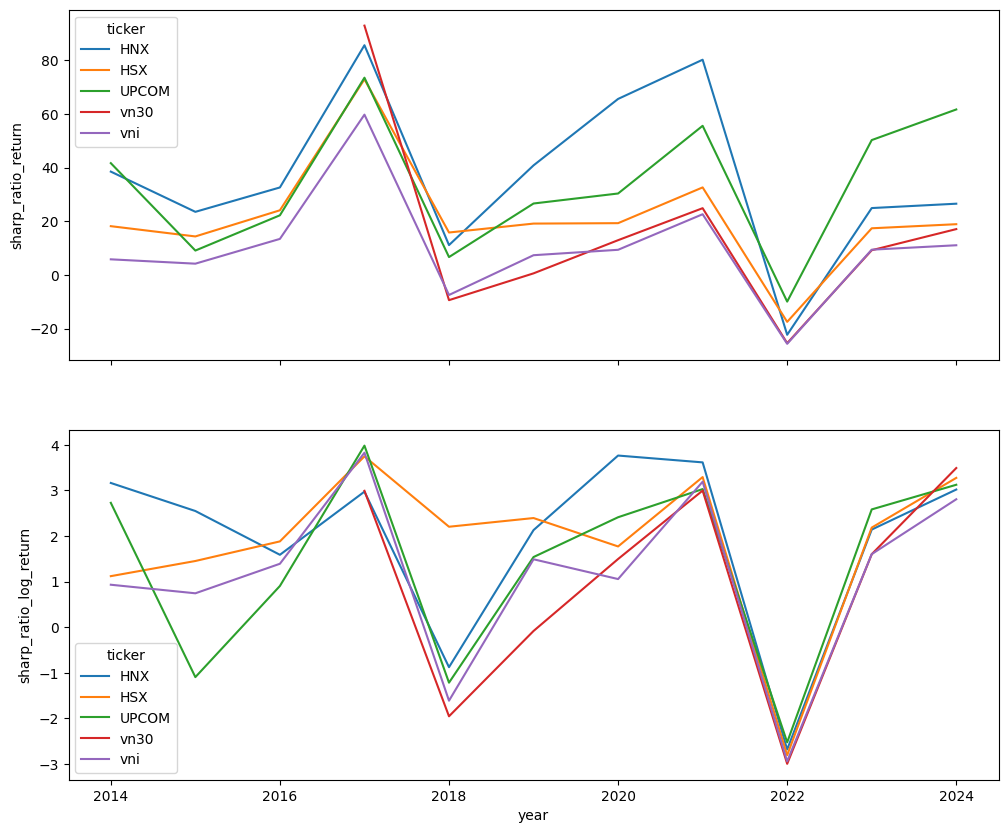

In [8]:
Market_visual.plot_sharp_ratios()